In [ ]:
# GOAL IS TO CREATE HEATMAP USING PERCENT IDENTITY MATRIX, RESULTS OF MSA FROM CLUSTAL OMEGA DATA
# import packages and libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# url where data is stored
file = "https://raw.githubusercontent.com/saraebell/Cas9-in-Two-Taxonomic-Orders-of-Bacteria-Python/main/conserved_PIM.txt"
# create dataframe to get species names only 
df= pd.read_csv(file, 
                   skiprows= 4, # skipping 4 rows 
                   engine = 'python', # avoid warning
                   sep = '\s+', # one or more space use '\s+'
                   #names=(species_names) 
                   ) 
# reset df index
df = df.reset_index()
# split column 'level_1' to get species names into list
species_names = df['level_1'].str.split().str[0].to_list()
species_names
# create new dataframe to work with data
conserved = pd.read_csv(file, 
                   skiprows= 5, # skipping 5 rows 
                   engine = 'python', # avoid warning
                   sep = '\s+', # one or more space use '\s+'
                   names=(species_names)) 
# reset index of dataframe
conserved = conserved.reset_index()
# drop column 'level_0'
conserved = conserved.drop(columns=('level_0'))
# rename column 'level_1'
conserved = conserved.rename(columns={"level_1": "Species Name"})
# set colummn 'Species Name' as index
conserved = conserved.set_index('Species Name')
#conserved

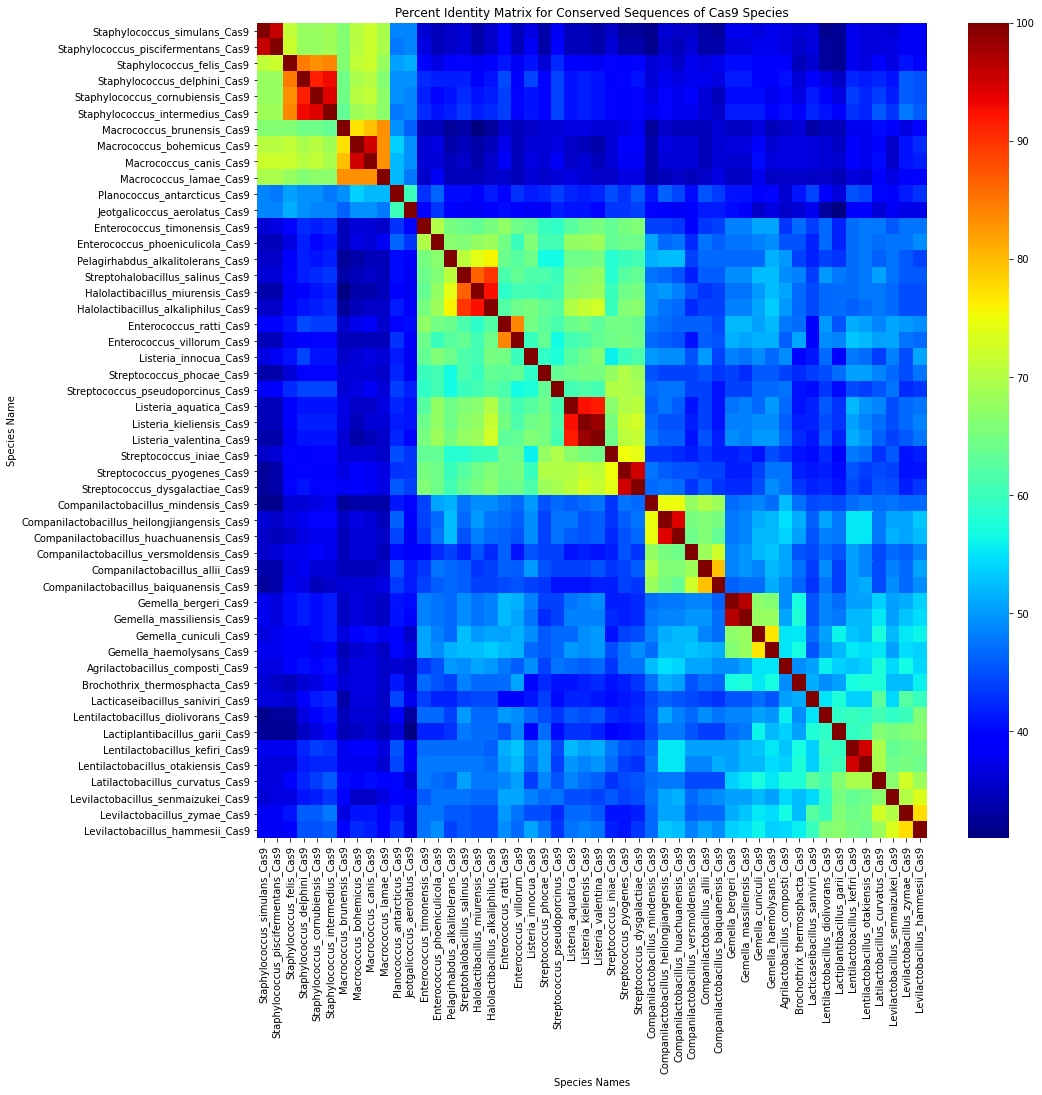

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))
# Add title
plt.title("Percent Identity Matrix for Conserved Sequences of Cas9 Species")
# Heatmap showing percent identity matrix 
# annot=True - This ensures that the values for each cell appear on the chart
sns.heatmap(data=conserved, cmap="jet"
            #annot=True # annot = annotation, used to plot
           )
# Add label for horizontal axis, same as y-axis
plt.xlabel("Species Names");

In [ ]:
pip install biopython

     |████████████████████████████████| 2.3MB 7.6MB/s 


In [ ]:
# GOAL IS TO CREATE TWO CATERGORICAL PLOTS FROM SEQUENCE FASTA FILE
# import necessary libraries and packages
from Bio.Seq import Seq
from Bio import SeqIO

In [ ]:
# open fasta file
# link to where fasta file is stored
fasta_url = "https://raw.githubusercontent.com/saraebell/Bioinformatics-II/main/lac_bac_conserved.txt"
with open('lac_bac_conserved.txt') as fasta_file:  # Will close handle cleanly
    identifiers = [] # create empty list
    lengths = []
    sequences = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id) # add to list
        lengths.append(len(seq_record.seq))
        sequences.append(repr(seq_record.seq))
        # list of species name, species length, and sequence 

In [ ]:
# create dictionary of lists 
dict = {'Species Name': identifiers, 'Sequence Length': lengths #, 'Sequences': sequences} 
}
# create new dataframe
seq_df = pd.DataFrame(dict)
seq_df['Genus'] = seq_df['Species Name'].str.split('_').str[0]
seq_df
# create new column using column 'Genus' 
def genus_to_order(row):
  if row['Genus'] == 'Streptococcus' or row['Genus'] == 'Enterococcus' or row['Genus']=='Companilactobacillus' or row['Genus'] == 'Lentilactobacillus' or row['Genus']== 'Levilactobacillus' or row['Genus']=='Lactiplantibacillus' or row['Genus'] == 'Lacticaseibacillus' or row['Genus'] == 'Agrilactobacillus' or row['Genus'] == 'Latilactobacillus':
    return 'Lactobacillales'
  if row['Genus'] == 'Listeria' or row['Genus'] == 'Streptohalobacillus' or row['Genus'] == 'Halolactibacillus' or row['Genus'] == 'Pelagirhabdus' or row['Genus'] == 'Brochothrix' or row['Genus']== 'Staphylococcus' or row['Genus']=='Planococcus' or row['Genus']=='Gemella' or row['Genus']=='Macrococcus' or row['Genus']=='Jeotgalicoccus':
    return 'Bacillales'
# create column 'Order'
seq_df['Order'] = seq_df.apply(lambda row: genus_to_order(row), axis='columns') 
seq_df

,Species Name,Sequence Length,Genus,Order
0,Streptococcus_pyogenes_Cas9,120,Streptococcus,Lactobacillales
1,Streptococcus_iniae_Cas9,120,Streptococcus,Lactobacillales
2,Streptococcus_phocae_Cas9,120,Streptococcus,Lactobacillales
3,Streptococcus_pseudoporcinus_Cas9,120,Streptococcus,Lactobacillales
4,Enterococcus_timonensis_Cas9,121,Enterococcus,Lactobacillales
5,Enterococcus_ratti_Cas9,119,Enterococcus,Lactobacillales
6,Enterococcus_villorum_Cas9,120,Enterococcus,Lactobacillales
7,Companilactobacillus_versmoldensis_Cas9,123,Companilactobacillus,Lactobacillales
8,Companilactobacillus_allii_Cas9,123,Companilactobacillus,Lactobacillales
9,Companilactobacillus_heilongjiangensis_Cas9,123,Companilactobacillus,Lactobacillales


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


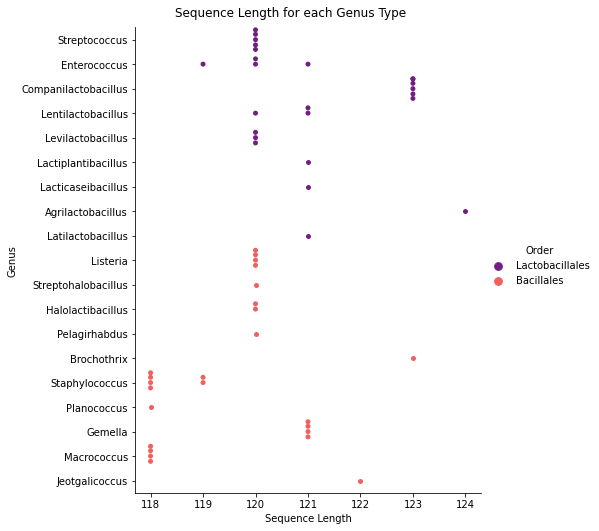

In [ ]:
# first categorical plot showing the sequence length of each genus
# Order for each Genus is shown by color
g=sns.catplot(
    data=seq_df, 
    x="Sequence Length",
    y="Genus",
    kind = 'swarm', # specify kind of category plot
    aspect=1, # aspect ratio
    hue="Order", # designate color by 'Order' column
    palette="magma",
    #jitter=0.3,
    height=7
    ) 
g.fig.suptitle("Sequence Length for each Genus Type", y=1.02);

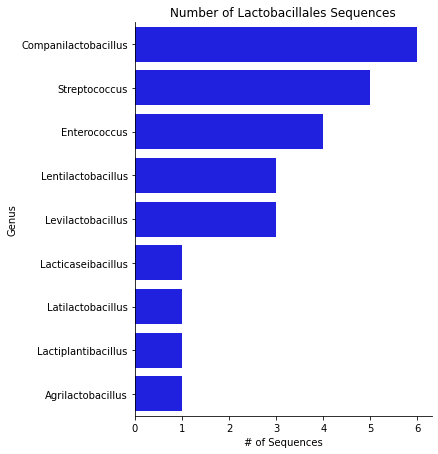

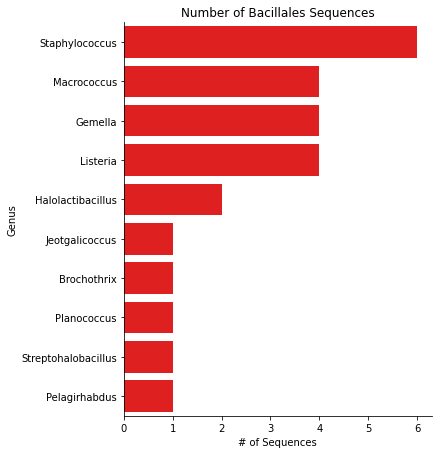

In [ ]:
# create dataframe for Lactobacillales
lacto_df = seq_df[seq_df.Order == 'Lactobacillales']
lacto_df
# create dataframe for Bacillales
bac_df = seq_df[seq_df.Order == 'Bacillales']
lacto_df
# second categorical plot counting the number of sequences for each Order Type 
sns.catplot(
    y="Genus",
    data=lacto_df,
    height = 6,
    kind='count', # specify kind of categorical plot
    order=lacto_df['Genus'].value_counts().index, # use parameter order to plot the categorical levels
    color='blue'
).set_axis_labels('# of Sequences', 'Genus');
plt.title("Number of Lactobacillales Sequences");

sns.catplot(
    y="Genus",
    data=bac_df,
    height = 6,
    kind='count', # specify kind of categorical plot
    order=bac_df['Genus'].value_counts().index, # use parameter order to plot the categorical levels
    color='Red'
).set_axis_labels('# of Sequences', 'Genus');
plt.title("Number of Bacillales Sequences");